# Example 4 - Comparing Simulated Motions with Empirical Ground Motion Models

In this example, we will compare the simulated motions with the ground motion models os Boore et al. (2014) and Kale et al. (2015).

First, we will import necessary modules and arrange the working directory.

In [1]:
import os
os.chdir('C:\\Users\\abdul\\Desktop\\Ders\\Python\\pyexsim12')

import pyexsim12 as pex
import gmm
import matplotlib.pyplot as plt
import numpy as np

# %% Creating the Source object
src_spec = pex.SourceSpec(mw=7.0, stress_drop=100, kappa=0.03)  # kappa_flag = 1 by default, so no need to change anything
fault_geom = pex.FaultGeom(fault_edge=(0, 0),
                            angles=[180.0, 90.0, 5.0],
                            fault_type="S",
                            len_width=[65.0, 25.0, 5.0, 5.0, 70.0])
hypo = pex.Hypocenter(hypo_along_fault=-1, hypo_down_dip=-1)  # Random hypocenter
rupture = pex.Rupture(vrup_beta=0.8, slip_weights="slip_weights.txt")
src = pex.Source(src_spec, fault_geom, hypo, rupture)

# %% Creating the Path object
time_pads = pex.TimePads(tpad1=20.0, tpad2=20.0, delta_t=0.01)
crust = pex.Crust(beta=3.7, rho=2.8)
geom_spread = pex.GeometricSpreading(n_seg=3, spread=[(1.0, -1.0), (30.0, -0.6), (50.0, -0.5)])
q_factor = pex.QualityFactor(q_min=0.0, q_zero=88, eta=0.9)
path_dur = pex.PathDuration()  # No input is provided as the default values will be used
path = pex.Path(time_pads, crust, geom_spread, q_factor, path_dur)

amp = pex.Amplification(site_amp="site_amp_tutorial.txt", crustal_amp="crustal_amp_tutorial.txt")

stem = "ex4_gmm"
misc = pex.Misc(stem=stem, inputs_filename=f"{stem}.in")
# Only one site will be used for demonstration (at 5 km distance, 30 degrees)
sites = pex.Sites([(5, 30)], site_coord_flag=2)  
sim = pex.Simulation(src, path, amp, misc, sites)
sim.create_input_file()
sim.run()

C:\Users\abdul\Desktop\Ders\Python\pyexsim12\pyexsim12\simulation.py:409: UserWarning: The simulation has been run before. To override previous results, set override=True while calling the Simulation.run() method
  warnings.warn("The simulation has been run before. To override previous results, set "


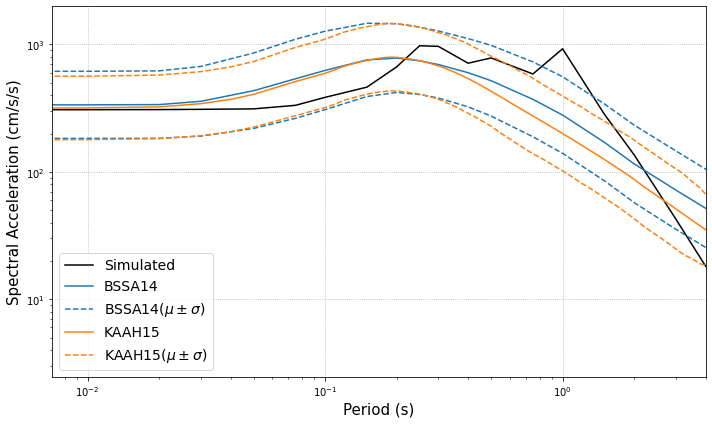

In [2]:
fig_gmm, axs_gmm = plt.subplots(figsize=(10, 6))
sim.plot_rp(site=1, axis=axs_gmm, periods=gmm.bssa14.periods, plot_dict={"color": "black", "label": "Simulated"})
sim.plot_bssa14(site=1, vs30=600, axis=axs_gmm, plot_dict={"label": "BSSA14", "label_pm": "BSSA14($\mu\pm\sigma$)"})
sim.plot_kaah15(site=1, vs30=600, axis=axs_gmm, plot_dict={"label": "KAAH15", "label_pm": "KAAH15($\mu\pm\sigma$)"})
axs_gmm.legend(loc="lower left", prop=dict(size=14))
axs_gmm.set_xscale("log")
axs_gmm.set_yscale("log")
axs_gmm.set_xlim(right=4)
axs_gmm.grid(linestyle="dotted")
axs_gmm.set_xlabel("Period (s)", fontsize=15)
axs_gmm.set_ylabel("Spectral Acceleration (cm/s/s)", fontsize=15)
plt.tight_layout()

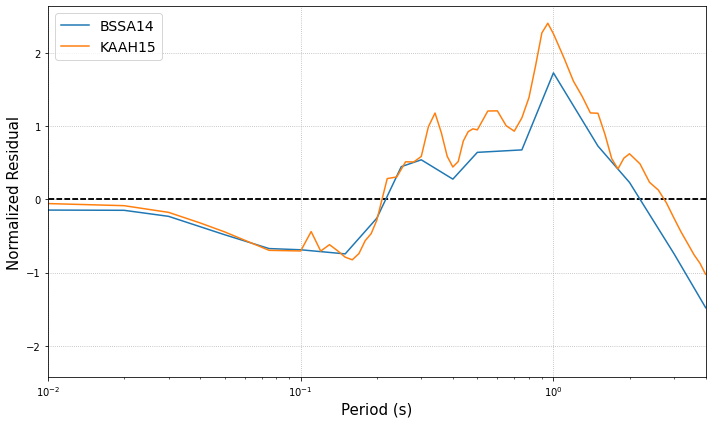

In [3]:
fig_eps, axs_eps = plt.subplots(figsize=(10, 6))
sim.plot_bssa14_eps(site=1, vs30=600, axis=axs_eps, plot_dict={"label": "BSSA14"})
sim.plot_kaah15_eps(site=1, vs30=600, axis=axs_eps, plot_dict={"label": "KAAH15"})
axs_eps.set_xlim(left=0.01, right=4)
axs_eps.set_xscale("log")
axs_eps.set_xlabel("Period (s)", fontsize=15)
axs_eps.set_ylabel("Normalized Residual", fontsize=15)
axs_eps.grid(linestyle="dotted")
axs_eps.legend(loc="upper left", prop={"size": 14})
plt.tight_layout()